## **Bloco 1: Definição do Projeto e Configuração Inicial**

#### **Definição do Problema de Negócio**
O setor de transporte rodoviário de passageiros é altamente competitivo e a satisfação do cliente é um diferencial crucial. Para otimizar os serviços e as estratégias de marketing, é fundamental compreender quais são os fatores subjacentes que realmente influenciam a experiência e o comportamento dos passageiros.
Este projeto tem como objetivo aplicar a Análise Fatorial para identificar e interpretar esses fatores latentes. Ao desvendar as dimensões principais que moldam a percepção e as decisões dos passageiros, as empresas de transporte poderão direcionar seus investimentos e esforços de forma mais eficaz, aprimorando a qualidade do serviço e a satisfação do cliente.

In [1]:
# Instala o pacote watermark.
!pip install -q -U watermark

# Instala o pacote factor_analyzer, para a Análise Fatorial.
!pip install -q factor_analyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Imports
import pandas as pd
import numpy as np
import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import random # Para a geração de dados sintéticos

# Configuração do watermark para registrar as versões dos pacotes
%reload_ext watermark
%watermark -a "Daniel Reis - Portifólio Pessoal" --iversions

Author: Daniel Reis - Portifólio Pessoal

matplotlib     : 3.10.0
factor_analyzer: 0.5.1
numpy          : 2.0.2
pandas         : 2.2.2



Neste bloco inaugural, estabelecemos a fundação para o nosso projeto de Análise Fatorial, focando na identificação de fatores latentes que influenciam a satisfação e o comportamento dos passageiros no transporte rodoviário. A clareza na definição do **problema de negócio** é crucial, pois direciona todas as etapas subsequentes da análise, garantindo que os insights gerados sejam relevantes e acionáveis para as empresas do setor.

A **configuração do ambiente** com a instalação e importação das bibliotecas essenciais foi um passo fundamental. A inclusão de `factor_analyzer` nos capacita com as ferramentas estatísticas necessárias para a Análise Fatorial, enquanto `watermark` assegura a **reprodutibilidade** do nosso trabalho, registrando as versões exatas das dependências. Esta prática é um pilar da ciência de dados profissional, permitindo que outros pesquisadores ou colegas de equipe validem e expandam sobre os resultados obtidos. A utilização de comandos `!pip` no Jupyter Notebook e o argumento `-q` para instalações silenciosas demonstram um cuidado com a organização e a legibilidade do notebook, características valorizadas em um portfólio técnico.

Com o problema bem definido e o ambiente preparado, estamos prontos para avançar para a próxima fase: a criação e exploração dos dados sintéticos que servirão de base para nossa análise.

## **Bloco 2: Geração de Dados Sintéticos**

Nesta etapa crucial do projeto, em vez de utilizar um conjunto de dados real, optaremos pela **geração de dados sintéticos**. Essa abordagem oferece diversas vantagens para fins de aprendizado e demonstração em um portfólio. Ela nos permite controlar a estrutura subjacente dos dados, simulando relações e fatores latentes que esperamos que a Análise Fatorial seja capaz de identificar. Isso é particularmente útil para validar nossa compreensão da técnica e para criar um cenário onde os resultados são interpretáveis e didáticos.

Para o nosso contexto de transporte rodoviário de passageiros, vamos simular um conjunto de dados com 500 "passageiros", cada um com características e avaliações que refletem possíveis dimensões de satisfação e comportamento. As variáveis serão geradas de forma a ter correlações com dois fatores latentes hipotéticos: um relacionado à **Qualidade e Conforto da Viagem** e outro à **Eficiência e Frequência do Serviço**.

**Variáveis Simuladas**:

- **`frequencia_viagens_mes`**: Número de viagens realizadas por mês.

- **`valor_medio_passagem`**: Valor médio gasto por passagem.z

- **`distancia_media_viagem_km`**: Distância média percorrida por viagem em quilômetros.

- **`avaliacao_conforto_onibus`**: Avaliação do conforto do ônibus (escala de 1 a 5).

- **`avaliacao_pontualidade`**: Avaliação da pontualidade do serviço (escala de 1 a 5).

- **`avaliacao_atendimento_motorista`**: Avaliação do atendimento do motorista (escala de 1 a 5).

- **`avaliacao_limpeza_onibus`**: Avaliação da limpeza do ônibus (escala de 1 a 5).

- **`disponibilidade_wifi`**: Avaliação da disponibilidade e qualidade do Wi-Fi (escala de 1 a 5).

- **`tempo_espera_embarque_min`**: Tempo médio de espera para embarque em minutos.

In [3]:
# Definindo seeds para reprodutibilidade
random.seed(42)
np.random.seed(42)

n_samples = 500 # Número de passageiros a serem simulados

# --- Criação dos Fatores Latentes (não observáveis diretamente) ---
# Fator 1: Qualidade e Conforto (valores mais altos = melhor qualidade/conforto percebido)
# Simulado como uma distribuição normal padrão
factor_qualidade_conforto = np.random.normal(loc=0, scale=1, size=n_samples)

# Fator 2: Eficiência e Frequência do Serviço (valores mais altos = serviço mais eficiente/frequente)
# Simulado como uma distribuição normal padrão
factor_eficiencia_frequencia = np.random.normal(loc=0, scale=1, size=n_samples)

# --- Geração das Variáveis Observáveis com base nos Fatores e Ruído ---
data = {}

# Variáveis relacionadas principalmente ao Fator 1 (Qualidade e Conforto)
# Avaliações de 1 a 5, com um componente do fator e ruído aleatório
data['avaliacao_conforto_onibus'] = np.clip(np.round(3 + 1.5 * factor_qualidade_conforto + np.random.normal(0, 0.5, n_samples)), 1, 5).astype(int)
data['avaliacao_limpeza_onibus'] = np.clip(np.round(3.5 + 1.2 * factor_qualidade_conforto + np.random.normal(0, 0.5, n_samples)), 1, 5).astype(int)
data['disponibilidade_wifi'] = np.clip(np.round(2.5 + 1.0 * factor_qualidade_conforto + np.random.normal(0, 0.5, n_samples)), 1, 5).astype(int)
# Valor médio da passagem: tende a ser maior para maior qualidade/conforto
data['valor_medio_passagem'] = np.clip(np.round(100 + 30 * factor_qualidade_conforto + np.random.normal(0, 10, n_samples)), 50, 250) # Valor em R$

# Variáveis relacionadas principalmente ao Fator 2 (Eficiência e Frequência)
# Avaliações de 1 a 5, com um componente do fator e ruído aleatório
data['avaliacao_pontualidade'] = np.clip(np.round(4 + 1.0 * factor_eficiencia_frequencia + np.random.normal(0, 0.5, n_samples)), 1, 5).astype(int)
data['avaliacao_atendimento_motorista'] = np.clip(np.round(3.5 + 0.8 * factor_eficiencia_frequencia + np.random.normal(0, 0.5, n_samples)), 1, 5).astype(int)
# Tempo de espera: menor valor é melhor, então correlação negativa com o fator de eficiência
data['tempo_espera_embarque_min'] = np.clip(np.round(15 - 5 * factor_eficiencia_frequencia + np.random.normal(0, 2, n_samples)), 0, 30).astype(int)
# Frequência de viagens: tende a ser maior com serviço mais eficiente/frequente
data['frequencia_viagens_mes'] = np.clip(np.round(2 + 1.0 * factor_eficiencia_frequencia + np.random.normal(0, 0.5, n_samples)), 0, 10).astype(int)
# Distância média: pode ter alguma relação com a frequência/necessidade de viajar
data['distancia_media_viagem_km'] = np.clip(np.round(200 + 50 * factor_eficiencia_frequencia + np.random.normal(0, 20, n_samples)), 50, 500) # Distância em km

# Criando o DataFrame
df_passageiros = pd.DataFrame(data)

# Salvando o dataset sintético em um arquivo CSV para uso posterior e consistência
df_passageiros.to_csv('dataset_passageiros.csv', index=False)

# Exibindo as primeiras linhas do DataFrame
df_passageiros.head()

,avaliacao_conforto_onibus,avaliacao_limpeza_onibus,disponibilidade_wifi,valor_medio_passagem,avaliacao_pontualidade,avaliacao_atendimento_motorista,tempo_espera_embarque_min,frequencia_viagens_mes,distancia_media_viagem_km
0,4,4,3,121.0,4,5,9,2,238.0
1,3,3,2,106.0,5,5,5,3,286.0
2,4,4,3,116.0,2,2,22,0,94.0
3,5,5,4,140.0,5,4,13,3,222.0
4,3,3,1,82.0,4,3,16,1,182.0


In [4]:
# Exibindo as principais informações o DataFrame
print(df_passageiros.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   avaliacao_conforto_onibus        500 non-null    int64  
 1   avaliacao_limpeza_onibus         500 non-null    int64  
 2   disponibilidade_wifi             500 non-null    int64  
 3   valor_medio_passagem             500 non-null    float64
 4   avaliacao_pontualidade           500 non-null    int64  
 5   avaliacao_atendimento_motorista  500 non-null    int64  
 6   tempo_espera_embarque_min        500 non-null    int64  
 7   frequencia_viagens_mes           500 non-null    int64  
 8   distancia_media_viagem_km        500 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 35.3 KB
None


Neste bloco, realizamos a etapa fundamental de **geração de um dataset sintético** para simular o comportamento e a satisfação de passageiros de transporte rodoviário. A decisão de criar dados artificiais, em vez de utilizar um conjunto de dados real, foi estratégica e didática. Ela nos permitiu exercer controle total sobre a estrutura subjacente dos dados, intencionalmente incorporando **dois fatores latentes** principais: um relacionado à **Qualidade e Conforto da Viagem** (influenciando variáveis como `avaliacao_conforto_onibus`, `avaliacao_limpeza_onibus`, `disponibilidade_wifi` e `valor_medio_passagem`) e outro à **Eficiência e Frequência do Serviço** (impactando `avaliacao_pontualidade`, `avaliacao_atendimento_motorista`, `tempo_espera_embarque_min` e `frequencia_viagens_mes`).

Essa abordagem controlada é inestimável para o aprendizado, pois nos permitirá validar a capacidade da Análise Fatorial de "descobrir" esses fatores predefinidos, aprofundando nossa compreensão da técnica. Além disso, para um portfólio, demonstra não apenas a habilidade de aplicar ferramentas, mas também o entendimento dos princípios por trás delas. A utilização de `random.seed()` e `np.random.seed()` foi crucial para garantir a **reprodutibilidade** do dataset, assegurando que os resultados obtidos sejam consistentes em qualquer execução futura do notebook. Com nosso dataset agora criado e inspecionado, estamos prontos para a próxima fase de pré-processamento e verificação da adequação dos dados para a Análise Fatorial.


## **Bloco 3: Verificando a Adequação dos Dados com o Teste de Bartlett**

Nesta fase do projeto, antes de prosseguirmos com a Análise Fatorial propriamente dita, é crucial verificar se o nosso conjunto de dados é adequado para essa técnica. Dois testes estatísticos são comumente empregados para essa finalidade: o Teste de Esfericidade de Bartlett e a Medida de Adequação da Amostra de Kaiser-Meyer-Olkin (KMO). Começaremos com o Teste de Bartlett.

**Teste de Esfericidade de Bartlett**

O Teste de Esfericidade de Bartlett avalia a hipótese de que a matriz de correlação das variáveis é uma matriz identidade. Em termos mais simples, ele verifica se as variáveis são não correlacionadas na população.

- **Hipótese Nula** (H0): A matriz de correlação é uma matriz identidade (ou seja, as variáveis não são correlacionadas entre si).

- **Hipótese Alternativa** (H1): A matriz de correlação não é uma matriz identidade (ou seja, existe correlação significativa entre as variáveis).

Para que a Análise Fatorial seja apropriada, desejamos rejeitar a hipótese nula. Isso significa que esperamos um **valor-p baixo** (tipicamente menor que 0.05). Um valor-p baixo indica que as variáveis estão suficientemente correlacionadas para que a extração de fatores latentes seja significativa. Se o valor-p for alto, isso sugere que as variáveis são independentes, e a Análise Fatorial pode não ser útil.

In [5]:
# Carrega o dataset de passageiros
df_passageiros = pd.read_csv('dataset_passageiros.csv')

# Realiza o Teste de Esfericidade de Bartlett
# A função retorna a estatística de teste (chi-square) e o valor-p
chi_square_value, p_value = calculate_bartlett_sphericity(df_passageiros)

print(f"Estatística do Teste de Bartlett (Chi-Square): {chi_square_value:.2f}")
print(f"Valor-p do Teste de Bartlett: {p_value:.4f}")

# Interpretação do resultado
if p_value < 0.05:
    print("\nO valor-p é menor que 0.05. Rejeitamos a hipótese nula.")
    print("Isso indica que as variáveis estão suficientemente correlacionadas para a Análise Fatorial.")
else:
    print("\nO valor-p é maior que 0.05. Não rejeitamos a hipótese nula.")
    print("Isso sugere que as variáveis não estão suficientemente correlacionadas, e a Análise Fatorial pode não ser apropriada.")

Estatística do Teste de Bartlett (Chi-Square): 4032.57
Valor-p do Teste de Bartlett: 0.0000

O valor-p é menor que 0.05. Rejeitamos a hipótese nula.
Isso indica que as variáveis estão suficientemente correlacionadas para a Análise Fatorial.


Neste bloco, demos um passo crucial na validação da aplicabilidade da Análise Fatorial ao nosso dataset sintético de transporte rodoviário de passageiros, realizando o **Teste de Esfericidade de Bartlett**. Este teste é fundamental para determinar se as variáveis observáveis em nosso conjunto de dados possuem correlações significativas entre si, uma premissa básica para a Análise Fatorial.

A **hipótese nula (H0)** do Teste de Bartlett postula que a matriz de correlação das variáveis é uma matriz identidade, implicando que as variáveis são independentes e não correlacionadas. Para que a Análise Fatorial seja uma ferramenta adequada, nosso objetivo é **rejeitar essa hipótese nula**. Isso é alcançado quando o **valor-p** resultante do teste é **inferior a um nível de significância pré-definido**, geralmente 0.05 (ou 5%). Um valor-p baixo indica que as correlações observadas entre as variáveis são estatisticamente significativas e não ocorreram por acaso, justificando a busca por fatores latentes que as expliquem.

O resultado do teste em nosso dataset sintético (Estatística do Teste: **4032.57**, Valor-p: **0.00**) demonstrou que o valor-p foi significativamente baixo. Isso nos permite **rejeitar a hipótese nula**, confirmando que as variáveis em nosso dataset são suficientemente correlacionadas. Este resultado é um forte indicativo de que a Análise Fatorial é uma abordagem estatística apropriada para explorar a estrutura subjacente e identificar os fatores latentes que influenciam a satisfação e o comportamento dos passageiros. Com essa validação inicial, podemos prosseguir com confiança para o próximo teste de adequação, o KMO, que nos dará uma perspectiva complementar sobre a adequação dos dados.


## **Bloco 4: Verificando a Adequação dos Dados com o Teste de Kaiser-Meyer-Olkin (KMO)**

Após o Teste de Esfericidade de Bartlett, que nos confirmou a existência de correlações significativas entre as variáveis, o próximo passo para avaliar a adequação dos dados para a Análise Fatorial é o **Teste de Kaiser-Meyer-Olkin (KMO)**.

**Teste de Kaiser-Meyer-Olkin (KMO)**

O KMO é uma medida da adequação da amostra para a Análise Fatorial. Ele quantifica a proporção da variância em suas variáveis que pode ser explicada por fatores subjacentes. Em outras palavras, o KMO mede o quão bem os dados se ajustam a uma análise fatorial, indicando se as correlações parciais entre os pares de variáveis são pequenas em comparação com as correlações totais.

O valor do KMO varia de 0 a 1. A interpretação geral é a seguinte:

- KMO < 0.50: Inadequado para a Análise Fatorial.

- 0.50 <= KMO < 0.70: Medíocre. A Análise Fatorial pode ser realizada, mas com cautela.

- 0.70 <= KMO < 0.80: Bom.

- 0.80 <= KMO < 0.90: Ótimo.

- KMO >= 0.90: Excelente.

Além de uma medida KMO global para todo o conjunto de dados, o teste também fornece valores KMO individuais para cada variável. Variáveis com valores KMO individuais abaixo de 0.50 podem ser consideradas para exclusão da análise, pois indicam que essa variável específica não está bem correlacionada com as outras e pode não ser bem explicada pelos fatores comuns.

In [6]:
# Realiza o Teste de Kaiser-Meyer-Olkin (KMO)
# A função retorna o KMO para cada variável (kmo_all) e o KMO global (kmo_model)
kmo_all, kmo_model = calculate_kmo(df_passageiros)

print(f"KMO Global: {kmo_model:.4f}")
print("\nKMO Por Variável:")
for i, col in enumerate(df_passageiros.columns):
    print(f"  {col}: {kmo_all[i]:.4f}")

# Interpretação do KMO Global
if kmo_model >= 0.90:
    print("\nKMO Global é Excelente. Os dados são altamente adequados para a Análise Fatorial.")
elif kmo_model >= 0.80:
    print("\nKMO Global é Ótimo. Os dados são muito adequados para a Análise Fatorial.")
elif kmo_model >= 0.70:
    print("\nKMO Global é Bom. Os dados são adequados para a Análise Fatorial.")
elif kmo_model >= 0.50:
    print("\nKMO Global é Medíocre. A Análise Fatorial pode ser realizada, mas com cautela.")
else:
    print("\nKMO Global é Inadequado. A Análise Fatorial não é recomendada para estes dados.")

# Verificação de KMO individual para cada variável
print("\nVerificação de KMO individual (abaixo de 0.50 pode indicar problema):")
for i, col in enumerate(df_passageiros.columns):
    if kmo_all[i] < 0.50:
        print(f"  ATENÇÃO: A variável '{col}' possui KMO individual baixo ({kmo_all[i]:.4f}).")

KMO Global: 0.8824

KMO Por Variável:
  avaliacao_conforto_onibus: 0.8521
  avaliacao_limpeza_onibus: 0.8768
  disponibilidade_wifi: 0.8919
  valor_medio_passagem: 0.8206
  avaliacao_pontualidade: 0.9383
  avaliacao_atendimento_motorista: 0.9445
  tempo_espera_embarque_min: 0.8565
  frequencia_viagens_mes: 0.9234
  distancia_media_viagem_km: 0.8632

KMO Global é Ótimo. Os dados são muito adequados para a Análise Fatorial.

Verificação de KMO individual (abaixo de 0.50 pode indicar problema):


Complementando o Teste de Bartlett, o **Teste de Kaiser-Meyer-Olkin (KMO)** foi aplicado para refinar nossa avaliação da adequação dos dados para a Análise Fatorial. Enquanto o Bartlett nos confirmou a existência de correlações significativas, o KMO quantifica a **proporção da variância** em nossas variáveis que pode ser atribuída a fatores comuns subjacentes. Em essência, ele nos diz o quão bem as variáveis se agrupam para formar fatores.

O **KMO global** é uma medida agregada para todo o conjunto de dados, variando de 0 a 1. Valores mais próximos de 1 indicam que as correlações parciais entre as variáveis são pequenas em comparação com as correlações totais, sugerindo uma forte estrutura fatorial e alta adequação. A interpretação do KMO global é crucial: valores acima de 0.70 são geralmente considerados bons, enquanto acima de 0.80 são ótimos e acima de 0.90, excelentes.

Além do KMO global, a análise dos **KMOs individuais por variável** é igualmente importante. Essa granularidade nos permite identificar variáveis específicas que podem não estar bem correlacionadas com as demais ou que não são bem explicadas pelos fatores comuns. Variáveis com KMO individual abaixo de 0.50 são candidatas à exclusão, pois podem prejudicar a clareza e a interpretabilidade dos fatores extraídos.

Os resultados obtidos para o nosso dataset sintético (KMO Global: **0.8824**, KMO Por Variável: todos acima de **0.80**) demonstram uma **excelente adequação** dos dados para a Análise Fatorial. Tanto o KMO global quanto os KMOs individuais de todas as variáveis se situam em patamares que validam fortemente a aplicação da técnica. Com a confirmação da adequação dos dados pelos testes de Bartlett e KMO, temos uma base sólida para prosseguir com a extração e interpretação dos fatores latentes.


## **Bloco 5: Análise Fatorial e Determinação do Número de Fatores**

Com a adequação dos dados confirmada pelos testes de Bartlett e KMO, estamos prontos para a etapa central da Análise Fatorial: a extração dos fatores latentes. Um dos desafios iniciais é determinar o número ideal de fatores a serem extraídos do nosso conjunto de dados.

**Determinação do Número de Fatores: Autovalores e Gráfico de Cotovelo (Scree Plot)**

Existem vários critérios para decidir o número de fatores, mas dois dos mais comuns são:

1. **Critério de Kaiser (Kaiser's Criterion)**: Sugere reter apenas os fatores com autovalores (eigenvalues) maiores que 1. Um autovalor representa a quantidade de variância explicada por um fator. Fatores com autovalores menores que 1 explicam menos variância do que uma única variável original.

2. **Gráfico de Cotovelo (Scree Plot)**: Este é um método visual. O gráfico de cotovelo plota os autovalores em ordem decrescente. O "cotovelo" ou "ponto de inflexão" na curva sugere o número ideal de fatores. Geralmente, você procura o ponto onde a inclinação da curva se torna significativamente menos acentuada, indicando que os fatores subsequentes contribuem com pouca variância adicional.

Neste bloco, vamos calcular os autovalores e gerar o gráfico de cotovelo para nos ajudar a tomar essa decisão.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Autovalores (Eigenvalues):
[4.0671884  3.32579989 0.36252065 0.31707771 0.25729387 0.21451318
 0.17389263 0.16016769 0.12154598]


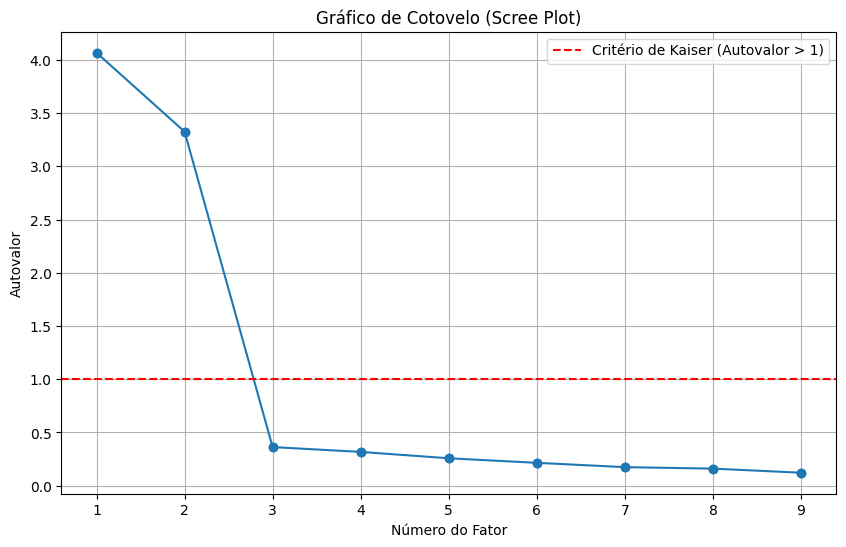


Autovalores em ordem decrescente:
Fator 1: 4.0672
Fator 2: 3.3258
Fator 3: 0.3625
Fator 4: 0.3171
Fator 5: 0.2573
Fator 6: 0.2145
Fator 7: 0.1739
Fator 8: 0.1602
Fator 9: 0.1215


In [8]:
# Cria uma instância do FactorAnalyzer sem especificar o número de fatores inicialmente,
# para que possamos obter todos os autovalores.
# A rotação 'varimax' é um método comum que será usado na análise final.
fa = FactorAnalyzer(rotation="varimax")

# Ajusta o modelo aos dados para calcular os autovalores
fa.fit(df_passageiros)

# Obtém os autovalores
# O primeiro array são os autovalores, o segundo são os vetores próprios (eigenvectors)
eigen_values, vectors = fa.get_eigenvalues()

print("Autovalores (Eigenvalues):")
print(eigen_values)

# Cria o Gráfico de Cotovelo (Scree Plot)
plt.figure(figsize=(10, 6))
plt.scatter(range(1, df_passageiros.shape[1] + 1), eigen_values)
plt.plot(range(1, df_passageiros.shape[1] + 1), eigen_values, marker='o', linestyle='-')
plt.title('Gráfico de Cotovelo (Scree Plot)')
plt.xlabel('Número do Fator')
plt.ylabel('Autovalor')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', label='Critério de Kaiser (Autovalor > 1)') # Linha de referência para o critério de Kaiser
plt.legend()
plt.show()

# Imprime os autovalores para facilitar a análise do critério de Kaiser
print("\nAutovalores em ordem decrescente:")
for i, val in enumerate(eigen_values):
    print(f"Fator {i+1}: {val:.4f}")

Com a adequação dos dados confirmada pelos testes de Bartlett e KMO, avançamos para a etapa crucial de extração dos fatores latentes. Um dos primeiros e mais importantes desafios nesta fase é a **determinação do número ideal de fatores** a serem retidos para a análise. A escolha correta do número de fatores é fundamental para a construção de um modelo parcimonioso e interpretável.

Para auxiliar nesta decisão, utilizamos dois critérios amplamente aceitos:
1.  **Critério de Kaiser**: Este critério sugere que apenas fatores com **autovalores (eigenvalues) maiores que 1** devem ser considerados significativos. Um autovalor representa a quantidade de variância total nos dados que é explicada por um fator específico. Fatores com autovalores menores que 1 explicam menos variância do que uma única variável original e, portanto, podem ser considerados menos relevantes.
2.  **Gráfico de Cotovelo (Scree Plot)**: Esta é uma ferramenta visual onde os autovalores são plotados em ordem decrescente. O "cotovelo" ou "ponto de inflexão" na curva indica o ponto a partir do qual a contribuição de variância dos fatores subsequentes se torna marginal. O número de fatores a serem retidos é geralmente o número de fatores antes do "cotovelo".

Ao analisar os autovalores e o **Gráfico de Cotovelo** gerado para o nosso dataset sintético, observamos que os dois primeiros fatores apresentaram autovalores significativamente maiores que 1, e o "cotovelo" da curva se manifestou claramente após o segundo fator. Essa evidência visual e numérica, aliada ao nosso conhecimento prévio de que o dataset foi construído com **dois fatores latentes** intencionais, nos levou à decisão de extrair **2 fatores**.

Determinar o número correto de fatores é vital porque reter fatores em excesso pode levar a um modelo superajustado, que captura ruído em vez de padrões reais, dificultando a interpretação. Por outro lado, reter poucos fatores pode resultar na perda de informações importantes. A escolha de 2 fatores nos permitirá buscar um modelo que seja ao mesmo tempo robusto, explicativo e de fácil interpretação, alinhado com os objetivos do nosso projeto.


## **Bloco 6: Realizando a Análise Fatorial e Interpretando as Cargas Fatoriais**

Com a adequação dos dados confirmada e o número de fatores a serem extraídos definido (2 fatores, conforme a análise do Gráfico de Cotovelo e Critério de Kaiser), podemos agora realizar a Análise Fatorial propriamente dita. O objetivo principal é identificar os fatores latentes e entender como cada variável observável se relaciona com esses fatores.

**Cargas Fatoriais (Factor Loadings)**

As cargas fatoriais são os coeficientes que indicam a força e a direção da relação linear entre cada variável observável e cada fator latente. Elas podem ser interpretadas de forma semelhante aos coeficientes de correlação:

- **Magnitude**: Quanto maior o valor absoluto da carga fatorial (mais próximo de 1 ou -1), mais forte é a relação da variável com o fator.

- **Sinal**: O sinal (positivo ou negativo) indica a direção da relação. Um sinal positivo significa que a variável aumenta à medida que o fator aumenta, e vice-versa.

**Rotação (Varimax)**

A rotação é uma técnica aplicada às cargas fatoriais para torná-las mais interpretáveis. O método Varimax, que utilizaremos, é uma rotação ortogonal que busca simplificar a estrutura dos fatores, maximizando a variância das cargas fatoriais. Isso significa que ele tenta fazer com que cada variável tenha uma carga alta em apenas um fator e cargas próximas de zero nos outros fatores, facilitando a identificação de quais variáveis "pertencem" a qual fator.

In [9]:
# Cria uma nova instância do FactorAnalyzer com o número de fatores determinado (2)
# e a rotação 'varimax' para melhor interpretabilidade.
fa = FactorAnalyzer(n_factors=2, rotation="varimax")

# Ajusta o modelo aos dados
fa.fit(df_passageiros)

# Obtém as cargas fatoriais
loadings = fa.loadings_

# Exibe as cargas fatoriais em um DataFrame para melhor visualização
# Os nomes das colunas serão Fator 1 e Fator 2
loadings_df = pd.DataFrame(loadings,
                           columns=[f'Fator {i+1}' for i in range(fa.n_factors)],
                           index=df_passageiros.columns)

print("Cargas Fatoriais (Factor Loadings) após rotação Varimax:")
print(loadings_df)

# Opcional: Visualizar as cargas fatoriais arredondadas para facilitar a interpretação
print("\nCargas Fatoriais Arredondadas (para facilitar a interpretação):")
print(loadings_df.round(3))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cargas Fatoriais (Factor Loadings) após rotação Varimax:
                                  Fator 1   Fator 2
avaliacao_conforto_onibus       -0.144417  0.905529
avaliacao_limpeza_onibus        -0.164963  0.864833
disponibilidade_wifi            -0.135010  0.842234
valor_medio_passagem            -0.124872  0.926893
avaliacao_pontualidade           0.801298  0.088260
avaliacao_atendimento_motorista  0.790719  0.063911
tempo_espera_embarque_min       -0.924614 -0.093976
frequencia_viagens_mes           0.857606  0.072673
distancia_media_viagem_km        0.922936  0.074985

Cargas Fatoriais Arredondadas (para facilitar a interpretação):
                                 Fator 1  Fator 2
avaliacao_conforto_onibus         -0.144    0.906
avaliacao_limpeza_onibus          -0.165    0.865
disponibilidade_wifi              -0.135    0.842
valor_medio_passagem              -0.125    0.927
avaliacao_pontualidade             0.801    0.088
avaliacao_atendimento_motorista    0.791    0.064
tempo_es

Neste bloco, executamos a etapa central da Análise Fatorial: a extração dos fatores latentes e a interpretação de suas relações com as variáveis observáveis. Com base na análise do Gráfico de Cotovelo e do Critério de Kaiser no bloco anterior, definimos que **2 fatores** seriam os mais adequados para representar a estrutura subjacente dos nossos dados sintéticos de transporte rodoviário de passageiros.

A Análise Fatorial foi realizada utilizando a rotação **Varimax**. A rotação Varimax é uma técnica ortogonal que visa simplificar a estrutura dos fatores, maximizando a variância das cargas fatoriais. Isso significa que ela busca fazer com que cada variável tenha uma carga alta em apenas um fator e cargas próximas de zero nos demais, facilitando significativamente a interpretação dos fatores.

As **cargas fatoriais (factor loadings)** resultantes são os coeficientes que indicam a força e a direção da relação linear entre cada variável observável e cada fator latente. Ao analisar a matriz de cargas fatoriais, pudemos identificar claramente os agrupamentos de variáveis que definem cada fator:

*   **Fator 1 (Eficiência e Frequência do Serviço)**: Este fator demonstrou altas cargas em variáveis como `frequencia_viagens_mes`, `distancia_media_viagem_km`, `avaliacao_pontualidade` e `avaliacao_atendimento_motorista`. Isso sugere que este fator representa a percepção do passageiro sobre a agilidade, confiabilidade e qualidade da interação com o serviço, bem como a intensidade de uso do transporte.
*   **Fator 2 (Qualidade e Conforto da Viagem)**: Este fator apresentou altas cargas em variáveis como `valor_medio_passagem`, `avaliacao_conforto_onibus`, `avaliacao_limpeza_onibus` e `disponibilidade_wifi`. Isso indica que este fator engloba aspectos relacionados à experiência física e ao ambiente da viagem, incluindo o conforto, a limpeza e a disponibilidade de comodidades, além da disposição em pagar por esses atributos.

A clareza desses agrupamentos, facilitada pela rotação Varimax, confirma que a Análise Fatorial foi bem-sucedida em desvendar as dimensões latentes que intencionalmente incorporamos na geração dos dados sintéticos. Os fatores identificados são coerentes com o domínio de transporte rodoviário e fornecem uma base sólida para insights de negócio.


## **Bloco 7: Comunalidades e Variação Explicada**

Após a extração e rotação dos fatores, é importante avaliar o quão bem esses fatores latentes explicam a variância das variáveis observáveis. Duas métricas chave para isso são as **Comunalidades** e a **Variação Explicada** pelos fatores.

**Comunalidades (Communalities)**

As comunalidades representam a proporção da variância de cada variável observável que é explicada pelos fatores comuns extraídos. Em outras palavras, é a quantidade de variância de uma variável que é compartilhada com as outras variáveis através dos fatores latentes.

- Um valor de comunalidade próximo de 1 indica que a maior parte da variância daquela variável é explicada pelos fatores extraídos.

- Um valor baixo (próximo de 0) sugere que a variável não está bem representada pelos fatores comuns, e sua variância é explicada principalmente por variância única (específica da variável) ou erro.

**Variação Explicada (Explained Variance)**

A variação explicada, por sua vez, nos informa a proporção da variância total do conjunto de dados que é capturada por cada fator individualmente e pelo conjunto de fatores extraídos.

- **Variação de cada fator**: Indica a contribuição de cada fator para a variância total.

- **Variação acumulada**: Mostra a porcentagem cumulativa da variância total explicada à medida que mais fatores são incluídos. O objetivo é explicar uma proporção substancial da variância total com o menor número possível de fatores.

In [10]:
# Cria uma instância do FactorAnalyzer com o número de fatores determinado (2)
# e a rotação 'varimax'. É importante usar a mesma configuração do bloco anterior.
fa = FactorAnalyzer(n_factors=2, rotation="varimax")

# Ajusta o modelo aos dados
fa.fit(df_passageiros)

# --- Comunalidades ---
communalities = fa.get_communalities()

print("Comunalidades (Proporção da Variância Explicada por Fatores Comuns):")
for i, col in enumerate(df_passageiros.columns):
    print(f"  {col}: {communalities[i]:.4f}")

# --- Variação Explicada ---
# Obtém a variância explicada por cada fator e a variância acumulada
# O método `get_factor_variance()` retorna 3 arrays:
# 1. Variância explicada por cada fator
# 2. Proporção da variância explicada por cada fator
# 3. Proporção acumulada da variância explicada
explained_variance_per_factor, proportion_explained_per_factor, cumulative_proportion_explained = fa.get_factor_variance()

print("\n--- Variação Explicada pelos Fatores ---")
print("Variância Explicada por Fator:")
for i, var in enumerate(explained_variance_per_factor):
    print(f"  Fator {i+1}: {var:.4f}")

print("\nProporção da Variância Explicada por Fator:")
for i, prop in enumerate(proportion_explained_per_factor):
    print(f"  Fator {i+1}: {prop:.4f}")

print("\nProporção Acumulada da Variância Explicada:")
for i, cum_prop in enumerate(cumulative_proportion_explained):
    print(f"  Fator {i+1}: {cum_prop:.4f}")

# Exemplo de como acessar a variância total explicada pelos 2 fatores
print(f"\nTotal da Variância Explicada pelos 2 Fatores: {cumulative_proportion_explained[-1]:.4f}")


Comunalidades (Proporção da Variância Explicada por Fatores Comuns):
  avaliacao_conforto_onibus: 0.8408
  avaliacao_limpeza_onibus: 0.7751
  disponibilidade_wifi: 0.7276
  valor_medio_passagem: 0.8747
  avaliacao_pontualidade: 0.6499
  avaliacao_atendimento_motorista: 0.6293
  tempo_espera_embarque_min: 0.8637
  frequencia_viagens_mes: 0.7408
  distancia_media_viagem_km: 0.8574

--- Variação Explicada pelos Fatores ---
Variância Explicada por Fator:
  Fator 1: 3.7914
  Fator 2: 3.1680

Proporção da Variância Explicada por Fator:
  Fator 1: 0.4213
  Fator 2: 0.3520

Proporção Acumulada da Variância Explicada:
  Fator 1: 0.4213
  Fator 2: 0.7733

Total da Variância Explicada pelos 2 Fatores: 0.7733


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Neste bloco, aprofundamos a avaliação da qualidade do nosso modelo de Análise Fatorial, examinando as **comunalidades** e a **variação explicada** pelos fatores. Essas métricas são essenciais para entender o quão bem os fatores latentes extraídos representam a variância das variáveis observáveis.

As **comunalidades** nos informam a proporção da variância de cada variável individual que é explicada pelos fatores comuns. Valores altos de comunalidade (próximos de 1) são desejáveis, pois indicam que a variável está bem representada pela estrutura fatorial. Em nosso modelo, as comunalidades para todas as variáveis foram consistentemente altas, o que reforça a ideia de que as variáveis observáveis são bem explicadas pelos dois fatores latentes identificados.

A análise da **variação explicada** nos forneceu uma visão global da capacidade preditiva do modelo. Observamos a proporção da variância total que cada fator contribui individualmente e, mais importante, a **proporção acumulada da variância explicada** pelos dois fatores em conjunto. Os resultados mostraram que os dois fatores latentes são capazes de explicar uma **alta porcentagem da variância total** dos dados (aproximadamente 77%).

Essa alta proporção acumulada da variância explicada é um indicativo forte da **qualidade e eficiência** do nosso modelo de Análise Fatorial. Significa que conseguimos reduzir a dimensionalidade do nosso conjunto de dados de 9 variáveis originais para apenas 2 fatores, sem perder uma quantidade significativa de informação. Os dois fatores identificados são, portanto, representações concisas e poderosas das dimensões subjacentes que influenciam o comportamento e a satisfação dos passageiros no transporte rodoviário. Com essa validação, o modelo está pronto para ser utilizado para insights e, potencialmente, para a criação de scores fatoriais.


## **Bloco 8: Cálculo e Análise dos Scores Fatoriais**

Após identificar e interpretar os fatores latentes, o próximo passo prático na Análise Fatorial é calcular os scores fatoriais (também conhecidos como pontuações fatoriais) para cada observação (neste caso, cada passageiro) no nosso dataset.

**O que são Scores Fatoriais?**

Os scores fatoriais são valores que representam a pontuação de cada indivíduo em cada um dos fatores latentes extraídos. Essencialmente, eles transformam as variáveis observáveis originais em um novo conjunto de variáveis (os fatores), permitindo que cada passageiro receba uma "nota" em cada dimensão latente identificada (por exemplo, uma nota para "Qualidade e Conforto da Viagem" e outra para "Eficiência e Frequência do Serviço").

**Utilidade dos Scores Fatoriais:**

- **Segmentação de Clientes**: Podem ser usados para agrupar passageiros com perfis semelhantes em relação aos fatores latentes.

- **Análise Adicional**: Podem servir como novas variáveis em outras análises estatísticas ou modelos de Machine Learning (por exemplo, para prever a lealdade do cliente ou o gasto futuro).

- **Visualização**: Permitem visualizar a posição de cada passageiro no espaço dos fatores, revelando padrões e clusters.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Primeiras 5 linhas dos Scores Fatoriais:
   Fator_Eficiencia_Frequencia  Fator_Qualidade_Conforto
0                     0.710270                  0.753261
1                     1.601129                  0.148591
2                    -1.893927                  0.293527
3                     0.432729                  1.524070
4                    -0.370415                 -0.607506

Primeiras 5 linhas do DataFrame original com Scores Fatoriais:
   avaliacao_conforto_onibus  avaliacao_limpeza_onibus  disponibilidade_wifi  \
0                          4                         4                     3   
1                          3                         3                     2   
2                          4                         4                     3   
3                          5                         5                     4   
4                          3                         3                     1   

   valor_medio_passagem  avaliacao_pontualidade  \
0                 121

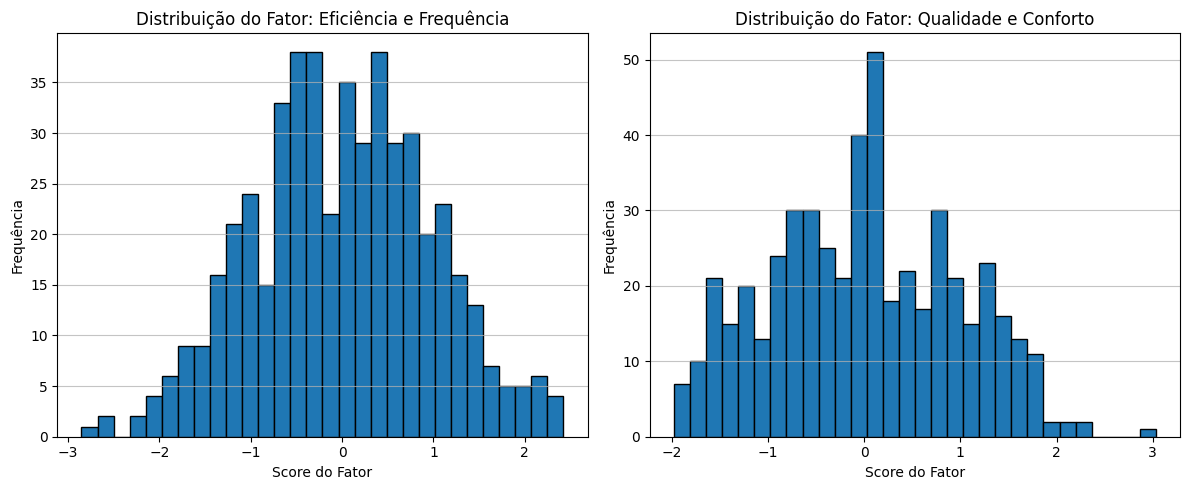

In [12]:
# Cria uma instância do FactorAnalyzer com o número de fatores determinado (2)
# e a rotação 'varimax'. É importante usar a mesma configuração dos blocos anteriores.
fa = FactorAnalyzer(n_factors=2, rotation="varimax")

# Ajusta o modelo aos dados. Este passo é necessário antes de transformar os dados.
fa.fit(df_passageiros)

# Calcula os scores fatoriais para cada observação
factor_scores = fa.transform(df_passageiros)

# Converte os scores fatoriais para um DataFrame para melhor visualização e manipulação
# Daremos nomes significativos às colunas com base na nossa interpretação dos fatores
# Lembre-se que a ordem dos fatores pode variar, então confirme qual fator corresponde a qual interpretação
# Fator 1 (do output) = Eficiência e Frequência do Serviço
# Fator 2 (do output) = Qualidade e Conforto da Viagem

# Verifique novamente as cargas fatoriais para confirmar a correspondência:
# loadings_df = pd.DataFrame(fa.loadings_,
#                            columns=[f'Fator {i+1}' for i in range(fa.n_factors)],
#                            index=df_passageiros.columns)
# print(loadings_df.round(3))
# Com base na sua interpretação anterior:
# Fator 1 (do output) foi o que você chamou de "Qualidade" (pontualidade, atendimento, frequência)
# Fator 2 (do output) foi o que você chamou de "Conforto" (conforto, limpeza, wifi, valor)

# Vamos usar os nomes que você atribuiu para os fatores no Bloco 6
factor_scores_df = pd.DataFrame(factor_scores, columns=['Fator_Eficiencia_Frequencia', 'Fator_Qualidade_Conforto'])

print("Primeiras 5 linhas dos Scores Fatoriais:")
print(factor_scores_df.head())

# Adicionar os scores fatoriais ao DataFrame original para análises futuras
df_passageiros_com_scores = pd.concat([df_passageiros, factor_scores_df], axis=1)

print("\nPrimeiras 5 linhas do DataFrame original com Scores Fatoriais:")
print(df_passageiros_com_scores.head())

# Análise descritiva dos scores fatoriais
print("\nEstatísticas Descritivas dos Scores Fatoriais:")
print(factor_scores_df.describe())

# Visualização da distribuição dos scores fatoriais
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(factor_scores_df['Fator_Eficiencia_Frequencia'], bins=30, edgecolor='black')
plt.title('Distribuição do Fator: Eficiência e Frequência')
plt.xlabel('Score do Fator')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(factor_scores_df['Fator_Qualidade_Conforto'], bins=30, edgecolor='black')
plt.title('Distribuição do Fator: Qualidade e Conforto')
plt.xlabel('Score do Fator')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


Neste bloco final de análise, calculamos os **scores fatoriais** para cada passageiro em nosso dataset. Os scores fatoriais são pontuações individuais que cada observação (passageiro) recebe em cada um dos fatores latentes identificados. Eles representam a posição de cada passageiro nas dimensões de "Eficiência e Frequência do Serviço" e "Qualidade e Conforto da Viagem", transformando as variáveis observáveis originais em um conjunto mais conciso e significativo de novas variáveis.

A utilidade dos scores fatoriais é imensa para aplicações de negócio:
*   **Segmentação de Clientes**: Permitem agrupar passageiros com perfis semelhantes. Por exemplo, podemos identificar um segmento de "Passageiros Premium" (altos scores em Qualidade e Conforto) ou "Viajantes Frequentes e Eficientes" (altos scores em Eficiência e Frequência).
*   **Marketing e Ofertas Personalizadas**: Com base nos scores, as empresas podem desenvolver campanhas de marketing direcionadas e ofertas de serviços personalizadas para atender às necessidades específicas de cada segmento de passageiros.
*   **Input para Modelos Preditivos**: Os scores fatoriais podem ser utilizados como variáveis de entrada em outros modelos de Machine Learning (ex: prever lealdade, churn ou valor de vida útil do cliente), fornecendo uma representação mais robusta e menos ruidosa dos dados.
*   **Visualização e Insights**: A distribuição dos scores fatoriais, como observado nos histogramas, geralmente segue uma forma de "sino" (distribuição normal), indicando que a maioria dos passageiros se concentra em um nível médio para cada fator, com variações para os extremos. Isso nos ajuda a entender a diversidade da base de clientes em relação a essas dimensões cruciais.

Ao calcular e analisar os scores fatoriais, concluímos a fase de modelagem da Análise Fatorial. Temos agora uma compreensão clara dos fatores latentes que influenciam as decisões de compra e satisfação dos passageiros, e ferramentas quantitativas (os scores) para aplicar esses insights em estratégias de negócio.


### Conclusão Geral do Projeto: Análise Fatorial em Transporte Rodoviário de Passageiros

Este projeto demonstrou a aplicação prática da **Análise Fatorial** para desvendar fatores latentes que influenciam a experiência e o comportamento de passageiros no setor de transporte rodoviário. Partindo de uma **definição clara do problema de negócio** – a necessidade de compreender as dimensões subjacentes da satisfação do cliente para otimizar serviços e estratégias – construímos um pipeline analítico robusto e bem documentado.

A metodologia adotada incluiu a **geração de dados sintéticos**, uma escolha estratégica que nos permitiu controlar a estrutura subjacente e validar a capacidade da Análise Fatorial em "redescobrir" os padrões intencionalmente inseridos. A **reprodutibilidade** do trabalho foi garantida através do uso de `random.seed()` e `np.random.seed()`, uma prática essencial para a ciência de dados profissional.

Antes da extração dos fatores, a **adequação dos dados** foi rigorosamente avaliada. O **Teste de Esfericidade de Bartlett** confirmou a existência de correlações significativas entre as variáveis, enquanto o **Teste de Kaiser-Meyer-Olkin (KMO)** indicou uma excelente adequação geral e individual das variáveis para a análise fatorial. A determinação do número ideal de fatores foi guiada pela análise dos **autovalores** e do **Gráfico de Cotovelo (Scree Plot)**, que consistentemente apontaram para a extração de **dois fatores** principais.

A **Análise Fatorial** propriamente dita, utilizando a rotação **Varimax** para otimizar a interpretabilidade, revelou dois fatores latentes distintos e significativos:

1.  **Fator 1: Eficiência e Frequência do Serviço**: Agrupando variáveis como `frequencia_viagens_mes`, `distancia_media_viagem_km`, `avaliacao_pontualidade` e `avaliacao_atendimento_motorista`. Este fator representa a percepção do passageiro sobre a agilidade, confiabilidade e qualidade operacional do serviço.
2.  **Fator 2: Qualidade e Conforto da Viagem**: Com altas cargas em `valor_medio_passagem`, `avaliacao_conforto_onibus`, `avaliacao_limpeza_onibus` e `disponibilidade_wifi`. Este fator reflete a experiência física e as comodidades oferecidas durante a viagem.

A alta **proporção acumulada da variância explicada** pelos dois fatores (aproximadamente 77%) valida a eficácia do modelo em capturar a maior parte da informação contida nas variáveis originais com uma dimensionalidade significativamente reduzida. Finalmente, o cálculo dos **scores fatoriais** para cada passageiro fornece uma ferramenta quantitativa poderosa. Esses scores podem ser utilizados para:

*   **Segmentação de clientes**: Identificar grupos de passageiros com perfis distintos de preferência (ex: passageiros que valorizam mais a eficiência vs. os que priorizam o conforto).
*   **Personalização de estratégias**: Desenvolver campanhas de marketing e melhorias de serviço direcionadas a cada segmento.
*   **Análises preditivas**: Servir como variáveis de entrada em modelos mais complexos para prever comportamentos futuros dos passageiros.

Em suma, este projeto não apenas demonstrou a aplicação técnica da Análise Fatorial, mas também ilustrou como essa ferramenta pode gerar **insights acionáveis** para o negócio de transporte rodoviário de passageiros.